In [8]:
#Web Scrape
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
import requests
from bs4 import BeautifulSoup
def get_video_links(archive_url):

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links, number):

	directory_path = f"/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/{number}/"
	print(directory_path)

	for link in video_links:
		file_name = f"{directory_path}{link.split('/')[-1]}"

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)

		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return
for i in range(10):
	archive_url = f"https://clarksonmsda.org/ml/audio2/data/numbers/{i}/"

	video_links = get_video_links(archive_url)

	download_video_series(video_links, i)

/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/0/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/1/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/2/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/3/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/4/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/5/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/6/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/7/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_project/Final-Project-Audio/audio/8/
All videos downloaded!
/Users/rakeshkantharaju/git_hub/deep_learning_

In [2]:
#WaveShow
import librosa as librosa
import os
path = "audio/4"
y,sr=librosa.load('audio/0/american_f_Alexa_20230406110149.wav',sr=32000)
librosa.display.waveshow(y,sr=sr,color='black')
sr

/var/folders/sz/vd3jtnkx0f7crslcw73k1nv40000gn/T/ipykernel_35581/2915352130.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr=librosa.load('audio/0/american_f_Alexa_20230406110149.wav',sr=32000)
/Users/rakeshkantharaju/Library/Python/3.9/lib/python/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'audio/0/american_f_Alexa_20230406110149.wav'

In [ ]:
#Wave vs Spectrogram
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/0"
dir_list = os.listdir(path)
spectrograms = []
waveforms = []
for file in dir_list:
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
for i, (waveform, spectrogram) in enumerate(zip(waveforms, spectrograms)):
    plt.figure(figsize=(10, 8))
    
    # plot waveform
    plt.subplot(211)
    librosa.display.waveshow(waveform, sr=sr)
    plt.title(f'Waveform for {dir_list[i]}')
    
    # plot spectrogram
    plt.subplot(212)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max),
                                y_axis='linear', x_axis='time') 
    plt.title(f'Spectrogram for {dir_list[i]}')
    plt.colorbar(format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()


In [ ]:
#Mel-Spectrogram
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt
import os
path = "/Users/ksr/Machine Learning/Final Project Audio/audio/0"
dir_list = os.listdir(path)
spectrograms = []
waveforms = []
mel_spectrogram=[]
for i,file in enumerate(dir_list):
    actual='audio/0/'+file
    y, sr = librosa.load(actual)
    waveforms.append(y)
    spectrogram = librosa.stft(y)
    spectrograms.append(spectrogram)
    S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
    s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
    mel_spectrogram.append(s_db_mel)
    plt.figure(figsize=(14,5))
    img=librosa.display.specshow(s_db_mel,sr=sr,x_axis='s',y_axis='linear')
    plt.title(f'Mel Spectrogram for {dir_list[i]}')
    plt.colorbar()
    print(s_db_mel.shape)

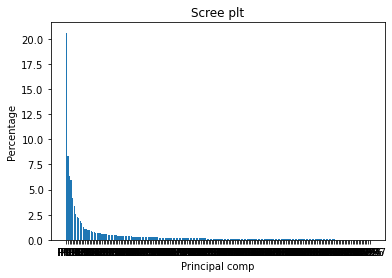

197

In [2]:
# PCA and SVM

import pickle
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
features=[]
target=[]
with open("data/mel_spectrograms.pickle", "rb") as f:
    data = pickle.load(f)
    for j in range(0,len(data)):
        for i in range(0,len(data[j])): 
            features.append(data[j][i].flatten())
            target.append(j)
features_df=pd.DataFrame(features)
features_df.fillna(0,inplace=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(features_df)
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(scaled)
pca_data = pca.transform(scaled)
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree plt')
plt.show()
pca.n_components_

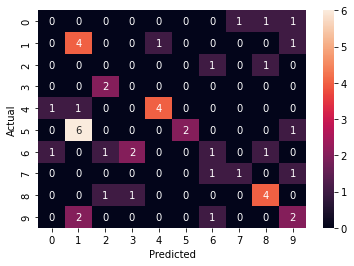

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
X_train,X_test,y_train,y_test=train_test_split(scaled,target,test_size=0.2)
from sklearn.svm import SVC 
model=SVC(C=500,kernel='rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)
cm=confusion_matrix(y_test,y_pred)
sb.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()